In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

# Read dataset

In [2]:
df = pd.read_csv('cc.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Data investigation

In [3]:
df.isna().sum().sum(), df.isnull().sum().sum(), df.duplicated().sum()

(314, 314, 0)

In [4]:
df.drop(columns=['CUST_ID'], inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<Axes: >

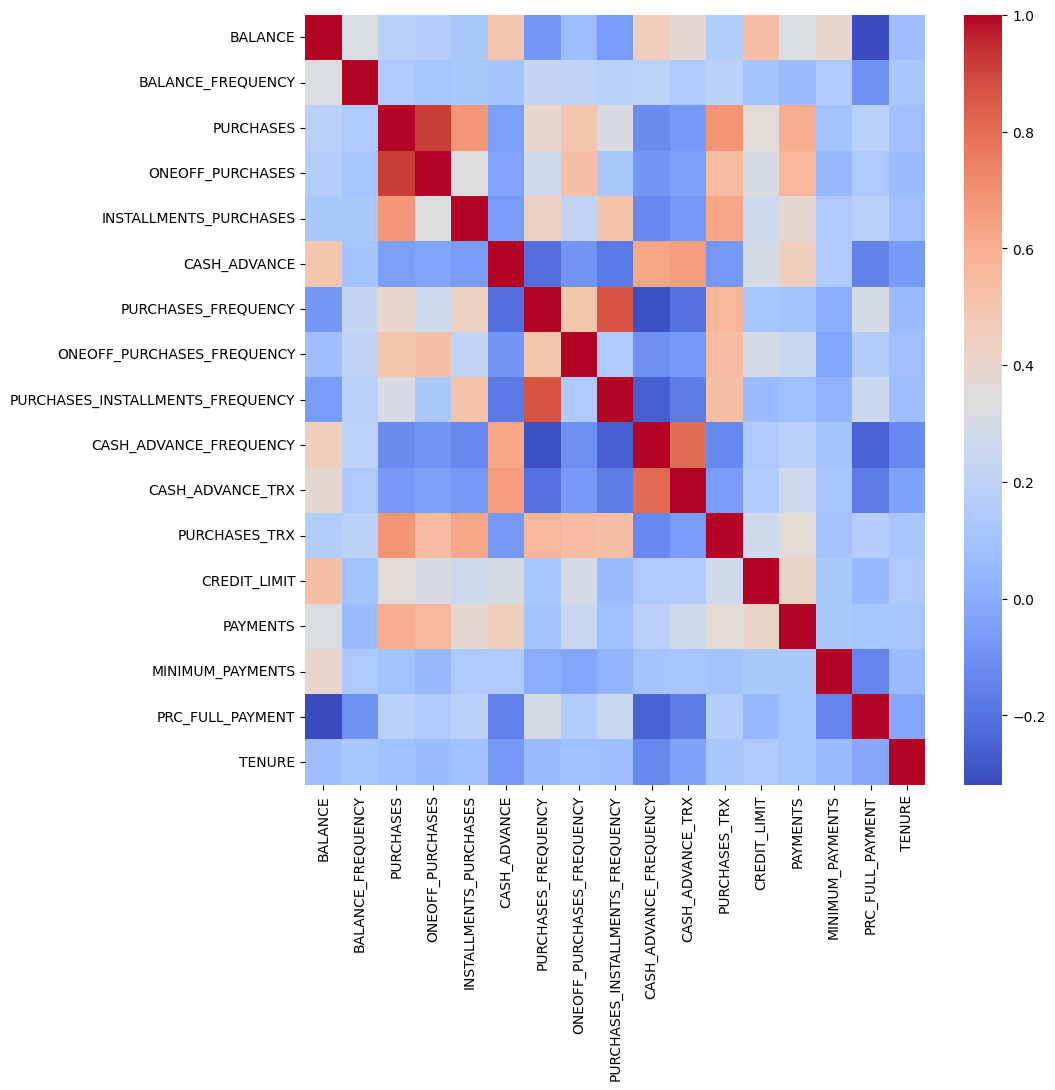

In [5]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='coolwarm')

# Data preprocessing

In [6]:
df.isna().sum(), df.isnull().sum()

(BALANCE                               0
 BALANCE_FREQUENCY                     0
 PURCHASES                             0
 ONEOFF_PURCHASES                      0
 INSTALLMENTS_PURCHASES                0
 CASH_ADVANCE                          0
 PURCHASES_FREQUENCY                   0
 ONEOFF_PURCHASES_FREQUENCY            0
 PURCHASES_INSTALLMENTS_FREQUENCY      0
 CASH_ADVANCE_FREQUENCY                0
 CASH_ADVANCE_TRX                      0
 PURCHASES_TRX                         0
 CREDIT_LIMIT                          1
 PAYMENTS                              0
 MINIMUM_PAYMENTS                    313
 PRC_FULL_PAYMENT                      0
 TENURE                                0
 dtype: int64,
 BALANCE                               0
 BALANCE_FREQUENCY                     0
 PURCHASES                             0
 ONEOFF_PURCHASES                      0
 INSTALLMENTS_PURCHASES                0
 CASH_ADVANCE                          0
 PURCHASES_FREQUENCY                   0
 

In [7]:
def preprocess(df):
    df = df.copy(deep=True)

    # Fill na
    for col in df.columns:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(df[col].median())

    return df

In [8]:
df = preprocess(df)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [9]:
df.isna().sum().sum(), df.isnull().sum().sum(), df.duplicated().sum()

(0, 0, 0)

# Data transformation

In [10]:
def transform(df):
    df = df.copy(deep=True)
    df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
    return df

In [11]:
df = transform(df)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


<Axes: >

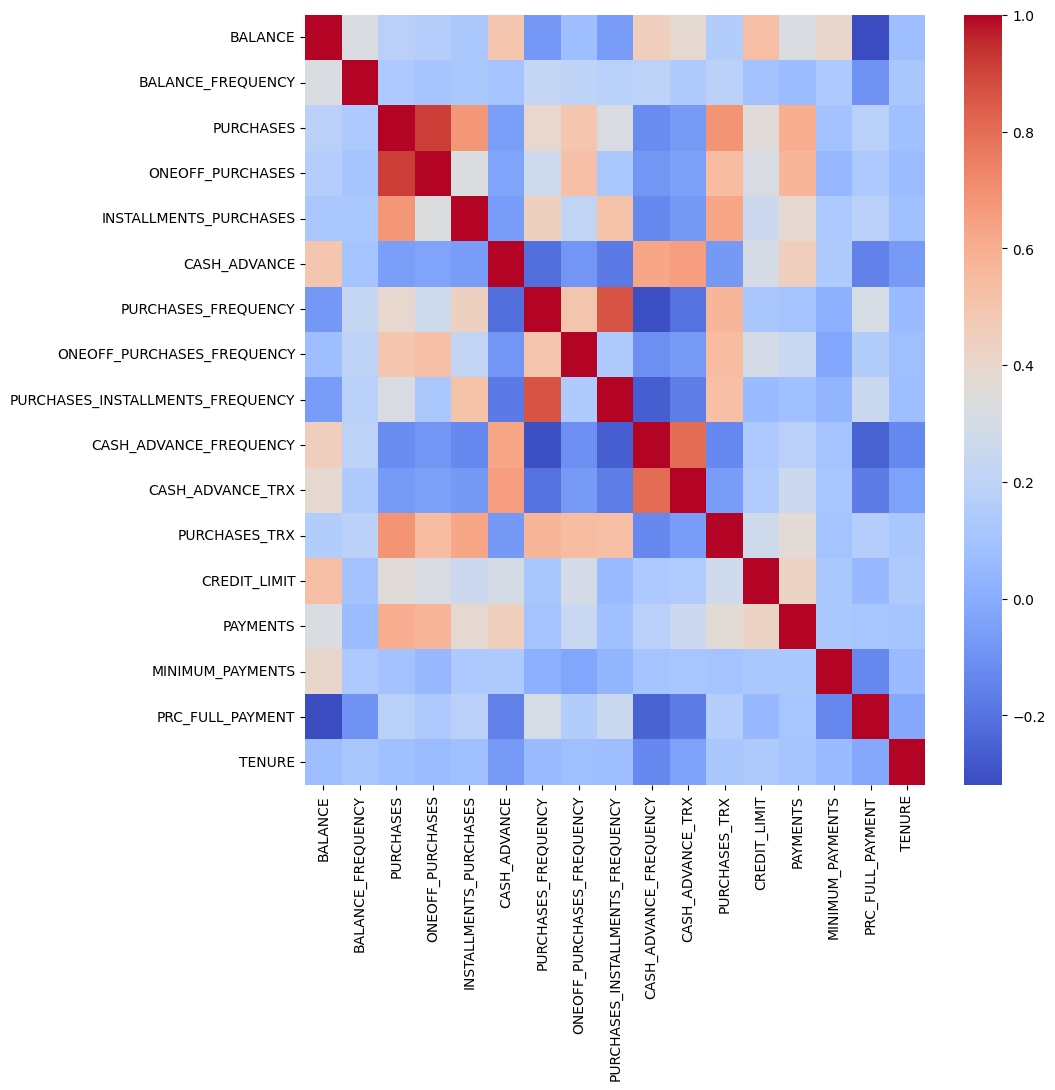

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='coolwarm')

# KMeans

In [15]:
from sklearn.cluster import KMeans

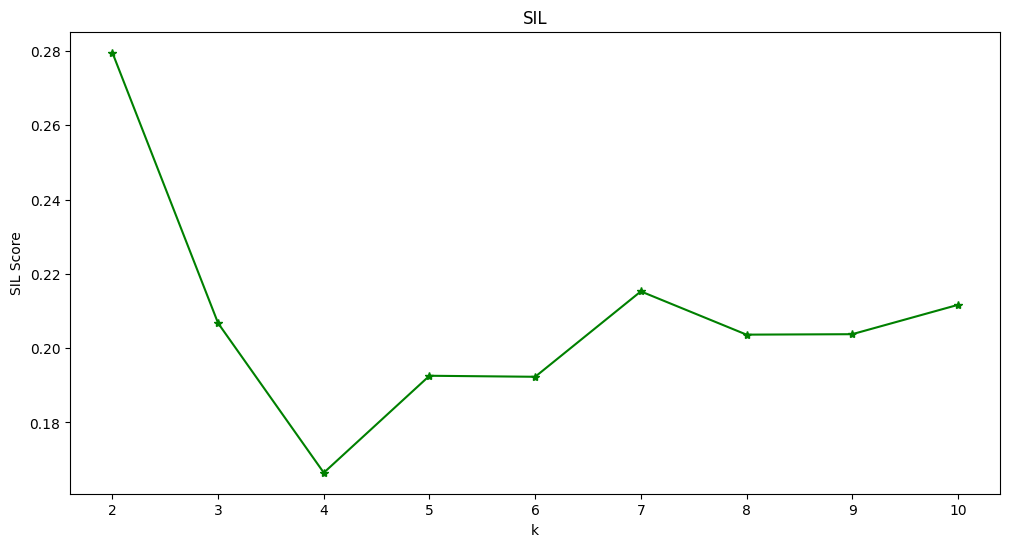

In [19]:
# Finding the optimal k with WSS
kmax = 10

def calc_silhouette(df, kmax):
    sil = []
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters=k, n_init='auto', init='k-means++', random_state=42).fit(df)
        sil.append(silhouette_score(df, kmeans.labels_))
    return sil

plt.figure(figsize=(12, 6))
plt.plot(range(2, kmax+1), calc_silhouette(df, kmax), 'g*-')
plt.xlabel('k')
plt.ylabel('SIL Score')
plt.title('SIL')
plt.show()

Optimal k to be `2`.

In [20]:
kmeans = KMeans(n_clusters=2, n_init='auto', init='k-means++', random_state=42).fit(df)
kmeans.labels_

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [21]:
calinski_harabasz_score(df, kmeans.labels_), davies_bouldin_score(df, kmeans.labels_), silhouette_score(df, kmeans.labels_)

(1609.6093161287697, 1.800893793461361, 0.27953987242960154)

Text(0, 0.5, 'PC2')

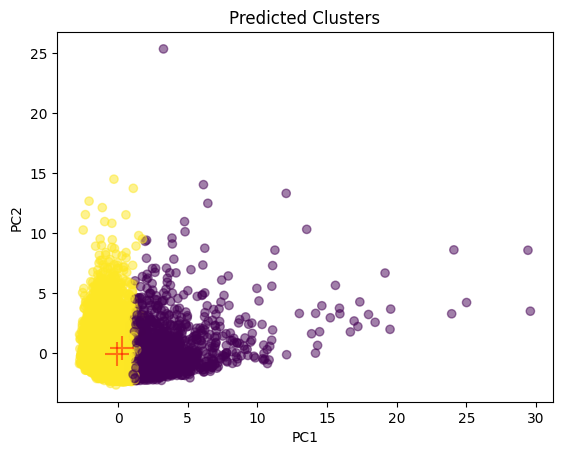

In [25]:
pca_df = PCA(n_components=2).fit_transform(df)
centers = kmeans.cluster_centers_

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5, marker='+')
plt.title('Predicted Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Agglomerative Clustering

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [12.5, 12.5, 51.25, 51.25],
  [85.0, 85.0, 95.0, 95.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [105.0, 105.0, 123.75, 123.75],
  [90.0, 90.0, 114.375, 114.375],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [200.0, 200.0, 222.5, 222.5],
  [180.0, 180.0, 211.25, 211.25],
  [160.0, 160.0, 195.625, 195.625],
  [102.1875, 102.1875, 177.8125, 177.8125],
  [31.875, 31.875, 140.0, 140.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [285.0, 285.0, 303.75, 303.75],
  [270.0, 270.0, 294.375, 294.375],
  [250.0, 250.0, 282.1875, 282.1

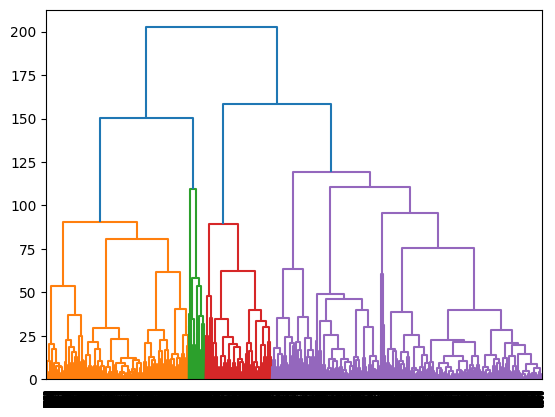

In [27]:
dendrogram(linkage(df, method='ward'))

We cut thru at about level `100`, giving us 7 clusters from the viz.

In [28]:
agglomerative = AgglomerativeClustering(n_clusters=7).fit(df)
agglomerative.labels_

array([0, 2, 0, ..., 4, 4, 4])

In [29]:
calinski_harabasz_score(df, agglomerative.labels_), davies_bouldin_score(df, agglomerative.labels_), silhouette_score(df, agglomerative.labels_)

(1067.3695769795465, 1.4735531419026628, 0.16173398544339443)

Text(0, 0.5, 'PC2')

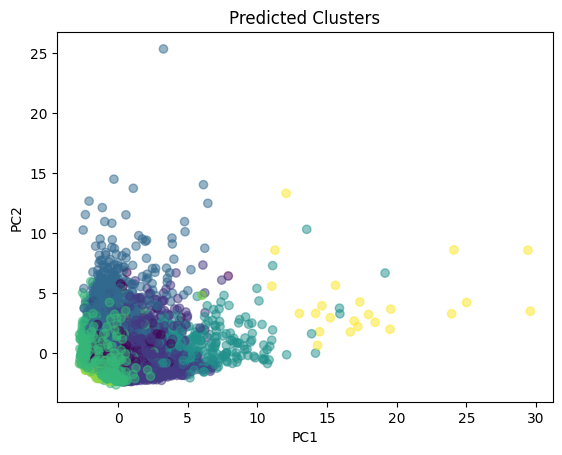

In [30]:
pca_df = PCA(n_components=2).fit_transform(df)

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=agglomerative.labels_, cmap='viridis', alpha=0.5)
plt.title('Predicted Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

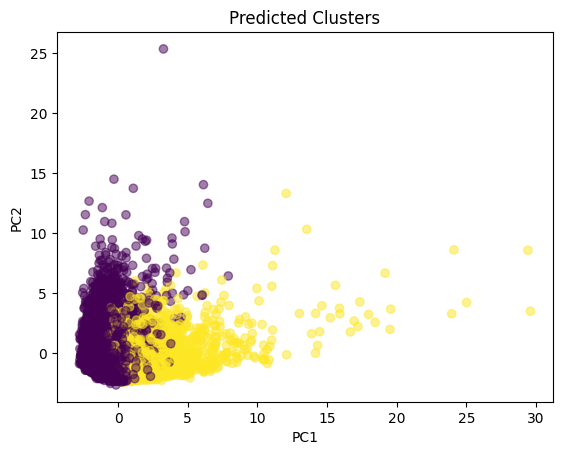

In [35]:
agglomerative = AgglomerativeClustering(n_clusters=2).fit(df)
agglomerative.labels_

pca_df = PCA(n_components=2).fit_transform(df)

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=agglomerative.labels_, cmap='viridis', alpha=0.5)
plt.title('Predicted Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

# BIRCH

In [36]:
from sklearn.cluster import Birch

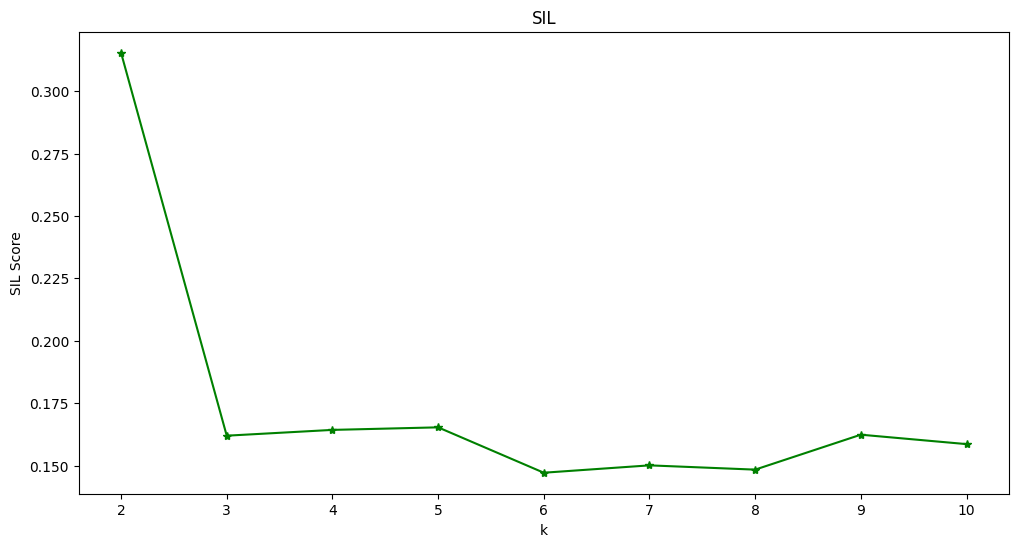

In [37]:
kmax = 10

def calc_silhouette(df, kmax):
    sil = []
    for k in range(2, kmax+1):
        birch = Birch(n_clusters=k, compute_labels=True).fit(df)
        sil.append(silhouette_score(df, birch.labels_))
    return sil

plt.figure(figsize=(12, 6))
plt.plot(range(2, kmax+1), calc_silhouette(df, kmax), 'g*-')
plt.xlabel('k')
plt.ylabel('SIL Score')
plt.title('SIL')
plt.show()

In [38]:
birch = Birch(n_clusters=2, compute_labels=True).fit(df)
birch.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
calinski_harabasz_score(df, birch.labels_), davies_bouldin_score(df, birch.labels_), silhouette_score(df, birch.labels_)

(1336.1756873659383, 1.633976840007643, 0.31540774923876064)

Text(0, 0.5, 'PC2')

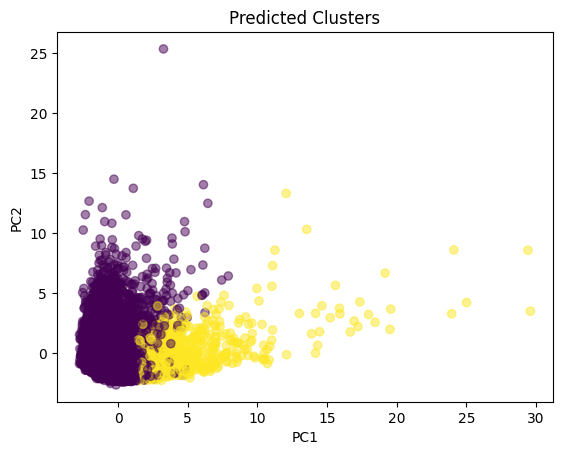

In [40]:
pca_df = PCA(n_components=2).fit_transform(df)

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=birch.labels_, cmap='viridis', alpha=0.5)
plt.title('Predicted Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

# DBSCAN

In [42]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

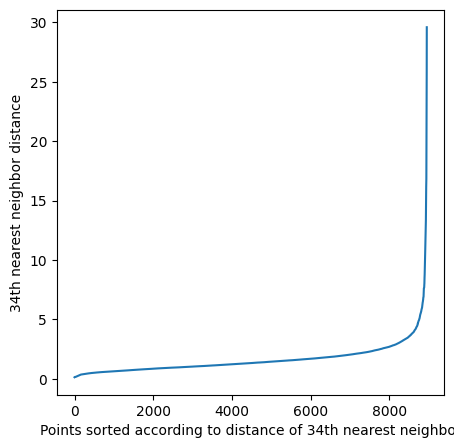

In [43]:
MIN_PTS = 2 * df.shape[1]

nearest_neighbors = NearestNeighbors(n_neighbors=MIN_PTS)
neighbors = nearest_neighbors.fit(df)
distances, indices = neighbors.kneighbors(df)

distances = np.sort(distances[:, MIN_PTS-1], axis=0)

# Plot the k-distance graph
plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points sorted according to distance of "+str(MIN_PTS)+"th nearest neighbor")
plt.ylabel(str(MIN_PTS)+"th nearest neighbor distance")
plt.show()

In [49]:
dbscan = DBSCAN(min_samples=MIN_PTS, eps=4.5).fit(df)
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 107


In [50]:
def plot_dbscan(X, labels, core_samples_mask, n_clusters_):
    unique_labels = set(labels)
    pca_X = PCA(n_components=2).fit_transform(X)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for cluster_id, color in zip(unique_labels, colors):
        # Use black for noise (label -1)
        if cluster_id == -1:
            color = [0, 0, 0, 1]

        cluster_mask = labels == cluster_id

        core_samples_in_cluster = pca_X[cluster_mask & core_samples_mask]
        plt.plot(core_samples_in_cluster[:, 0], core_samples_in_cluster[:, 1], 'o', 
                 markerfacecolor=tuple(color), markeredgecolor='k', markersize=14)
        non_core_samples_in_cluster = pca_X[cluster_mask & ~core_samples_mask]
        plt.plot(non_core_samples_in_cluster[:, 0], non_core_samples_in_cluster[:, 1], 'o', 
                 markerfacecolor=tuple(color), markeredgecolor='k', markersize=6)

    plt.title(f"Estimated number of clusters: {n_clusters_}")
    plt.show()

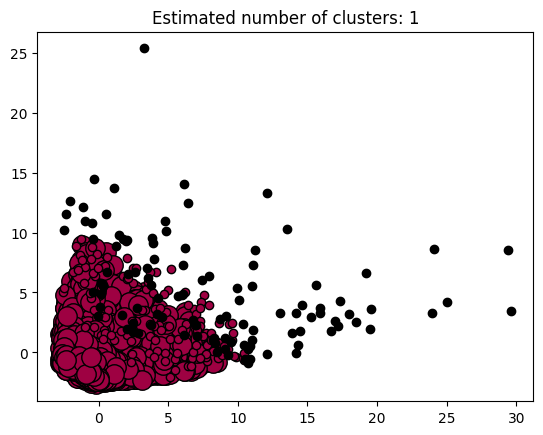

In [51]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

plot_dbscan(df, labels, core_samples_mask, n_clusters_)

In [52]:
calinski_harabasz_score(df, dbscan.labels_), davies_bouldin_score(df, dbscan.labels_), silhouette_score(df, dbscan.labels_)

(768.8574111635598, 1.537974201058669, 0.7053834122863222)

# Divisive

In [53]:
from HiPart.clustering import DePDDP
from HiPart.visualizations import dendrogram_visualization

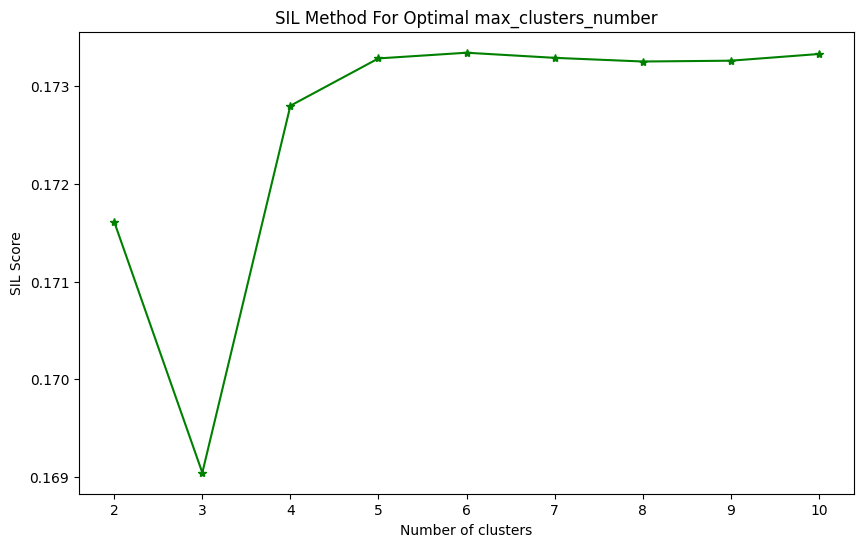

In [56]:
def calculate_sillhouette(df, kmax):
    sil = []
    for k in range(2, kmax+1):
        depddp = DePDDP(max_clusters_number=k).fit(df.values)
        sil.append(silhouette_score(df, depddp.labels_))
    return sil

plt.figure(figsize=(10,6))
plt.plot(range(2, 11), calculate_sillhouette(df, 10), 'g*-')
plt.xlabel('Number of clusters')
plt.ylabel('SIL Score')
plt.title('SIL Method For Optimal max_clusters_number')
plt.show()

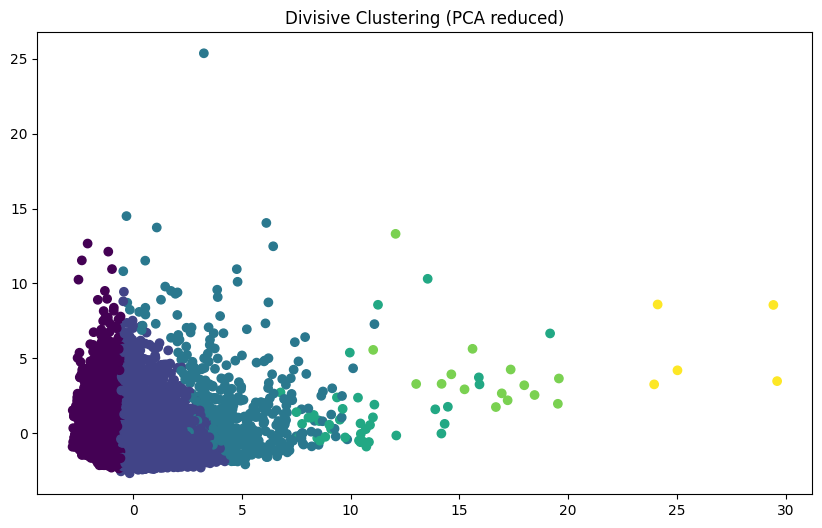

In [57]:
depddp = DePDDP(max_clusters_number=6).fit(df.values)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
plt.figure(figsize=(10,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=depddp.labels_)
plt.title('Divisive Clustering (PCA reduced)')
plt.show()

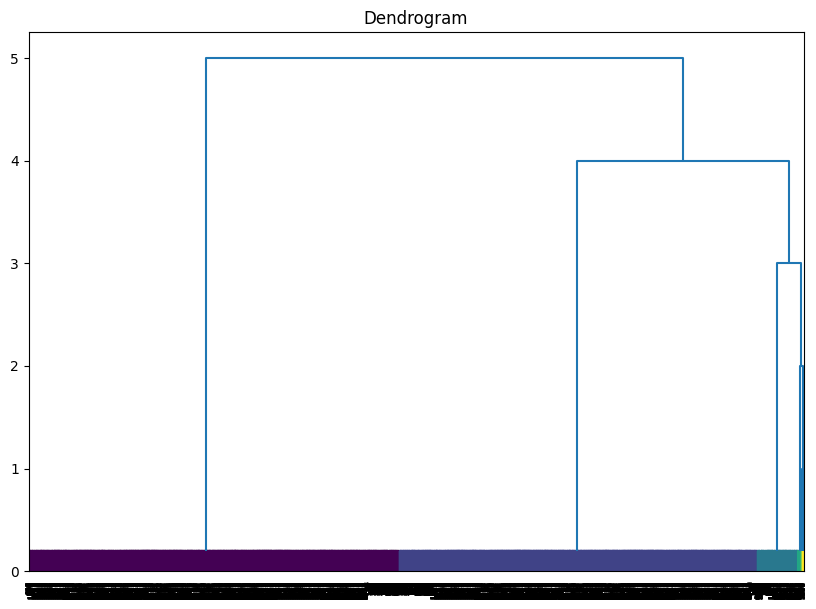

In [58]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram_visualization(depddp)
plt.show()

In [59]:
calinski_harabasz_score(df, depddp.labels_), davies_bouldin_score(df, depddp.labels_), silhouette_score(df, depddp.labels_)

(760.5397563174649, 1.7173811396692067, 0.17334425912503795)